<a href="https://colab.research.google.com/github/HenHimA1/A1/blob/master/REDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
from sklearn.neighbors import KNeighborsClassifier #memilih model
from sklearn.metrics import accuracy_score #menghitung akurasi model
from sklearn.model_selection import train_test_split #membagi data menjadi data training dan testing
from datetime import datetime
import numpy as np #operasi vektor dan matriks
import pandas as pd #load data untuk kebutuhan analisis data
import matplotlib.pyplot as plt #visualisasi data 2D/3D
import matplotlib.dates as md #format waktu
from matplotlib import rcParams #parameter visualisasi data 2D/3D

In [200]:
data = pd.read_csv('/content/Redd_Datasets1.csv', delimiter=';', names=['Time','Input 1','Input 2','Input 3',
                                                  'Input 4','Input 5','Input 6','Input 7','Input 8'])

In [201]:
data.head()

,Time,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8
0,1303104700,28,8,1,4,4,4,6,1
1,1303104704,29,8,1,5,5,4,6,0
2,1303104707,28,8,1,4,4,4,6,1
3,1303104710,27,8,1,4,4,3,7,0
4,1303104725,28,8,1,4,4,3,7,1


In [202]:
data.shape

(318759, 9)

In [203]:
data1 = data
data2 = data

In [204]:
data1['Time'] = [datetime.fromtimestamp(waktu) for waktu in data['Time']]

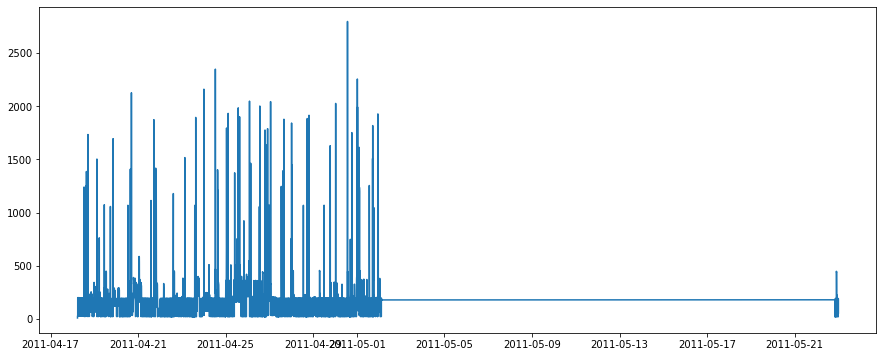

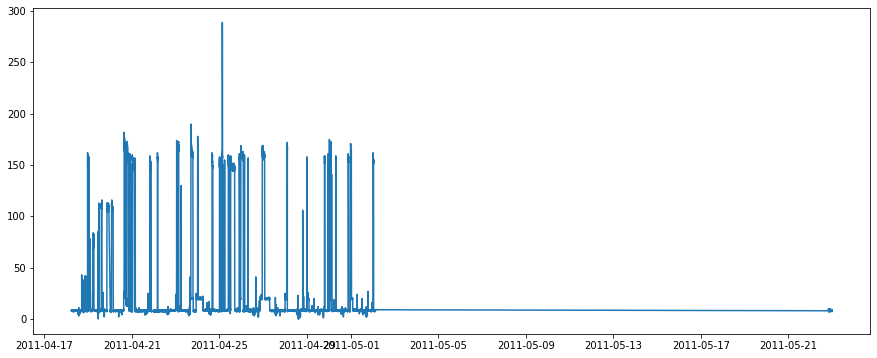

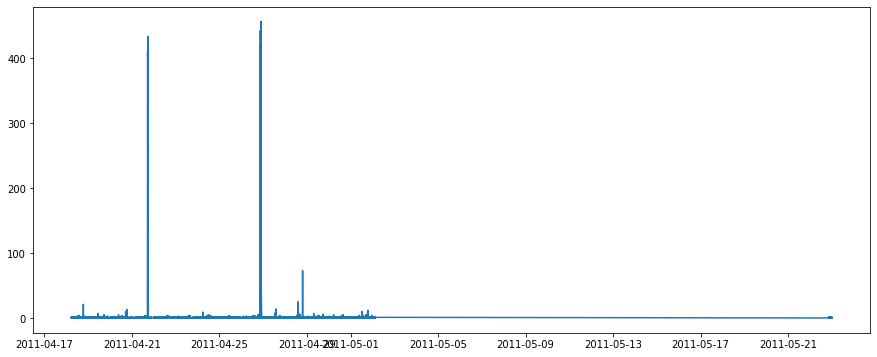

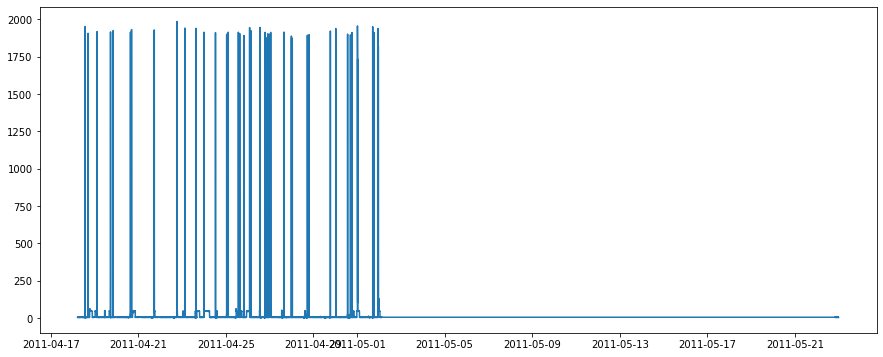

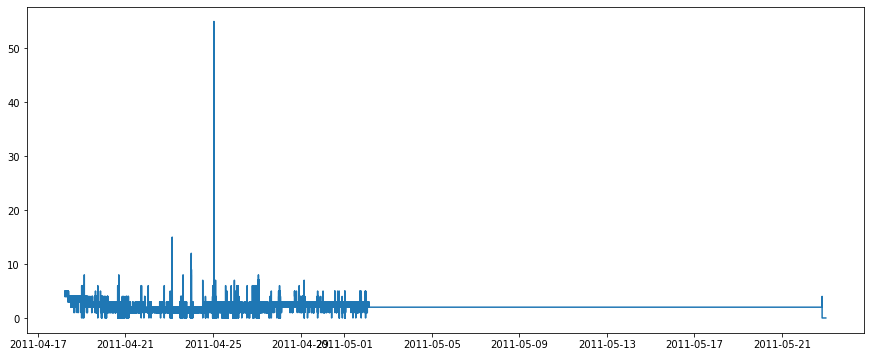

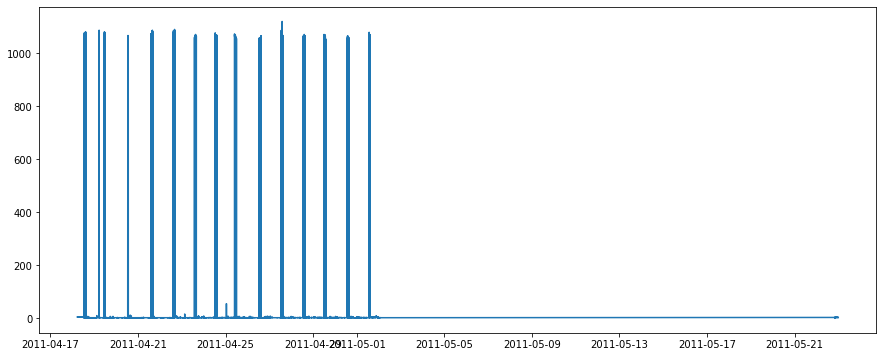

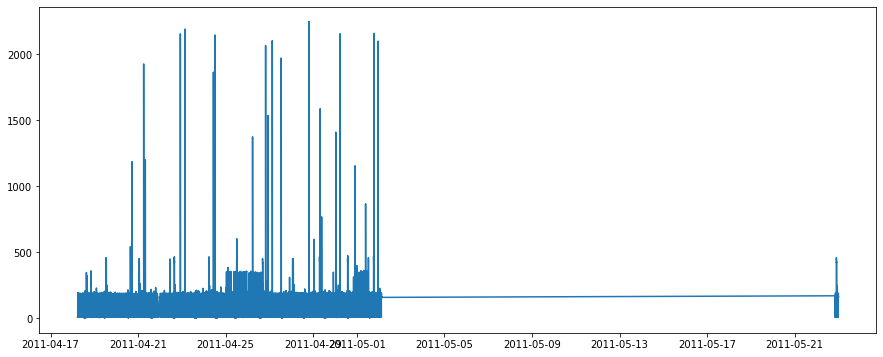

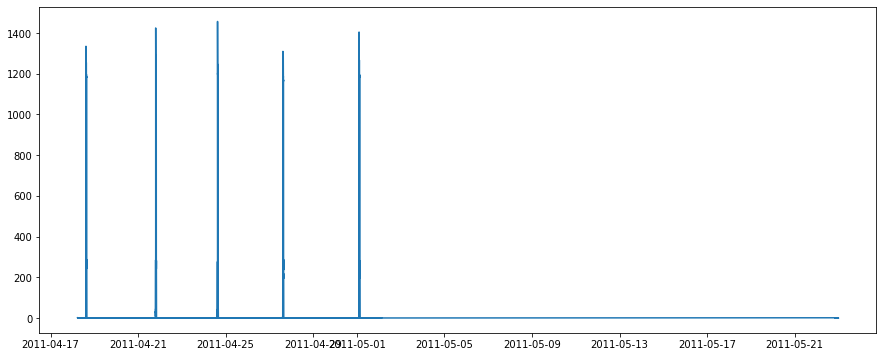

In [232]:
for i in range(1,9):
  Inputan = ("Input %s" % i)
  plt.plot(data1['Time'],data1[Inputan])
  plt.show()

In [206]:
def movingaverage(values, window):
	weights = np.repeat(1.0, window)/window
	smas = np.convolve(values, weights, 'same')
	return smas

In [207]:
def medfilter1(x,k): #fungsi dengan parameter x=data power & k=panjang median filter
    """
    Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    #assert adalah fungsi yang membatasi agar input sesuai dengan syarat
    assert k%2 == 1 #panjang median filter harus ganjil #k%2 harus sisa 1
    assert x.ndim == 1 #input harus 1D; array x (data power) harus 1D

    k2 = (k-1)//2 
    y = np.zeros((len (x), k), dtype = x.dtype) #matriks yg berisi 0
    y[:, k2] = x #mengganti nilai 0 dengan nilai x pada kolom ke k2
    #print(y)
    #print(x)

    for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        
        y[:j,i] = x[0]
        y[:-j, -(i+1)] = x[j:]
        y[-j:, -(i+1)] = x[-1]

    return np.median(y,axis=1)

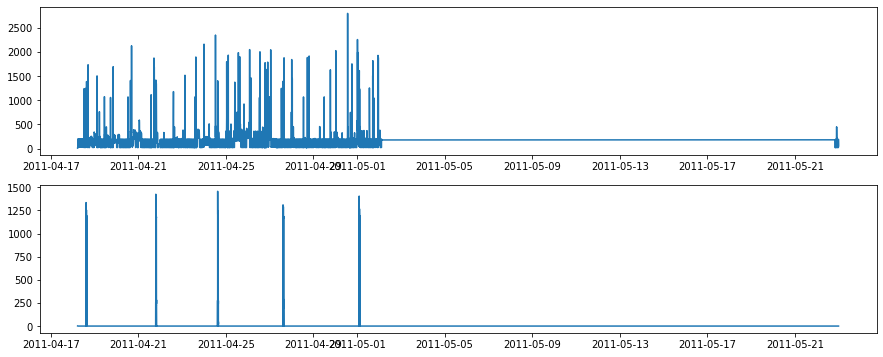

In [220]:
from scipy.signal import medfilt
data1['Input 1'] = medfilter1(data['Input 1'].to_numpy(), 11)
# data1['Input 1'] = medfilt(data['Input 1'],9)
plt.subplot(211)
plt.plot(data1['Time'],data['Input 1'])
plt.subplot(212)
plt.plot(data1['Time'],data['Input 8'])
plt.show()

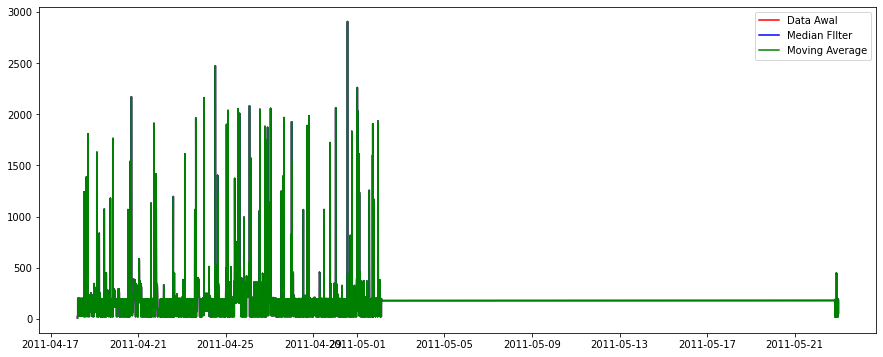

In [213]:
data2['Input 1'] = movingaverage(data1['Input 1'], 9)
plt.plot(data1['Time'],data['Input 1'], color="red", label ="Data Awal")
plt.plot(data1['Time'],data1['Input 1'], color="blue", label ="Median FIlter")
plt.plot(data1['Time'],data2['Input 1'], color="green", label ="Moving Average")
plt.legend()
plt.show()

data Y [ 0.09381086  0.10091989  0.34775941  0.4219966   0.55750066  0.65695022
  0.96940081  0.94059723  0.87637482  0.8538402   0.81553704  0.75839099
  0.74075654  0.50756044  0.47689441  0.40518094  0.38713765  0.29682859
  0.29496884  0.12742837  0.08102512  0.05689193  0.05338977 -0.05797992
 -0.08776485 -0.26432971 -0.42082464 -0.66655347 -0.68104667 -0.68968448
 -0.72911815 -0.75404581 -0.85289554 -0.93507411 -0.96803456 -0.99643995
 -0.99997983 -0.99993999 -0.99439521 -0.98371764]
0 uniform
1 distance


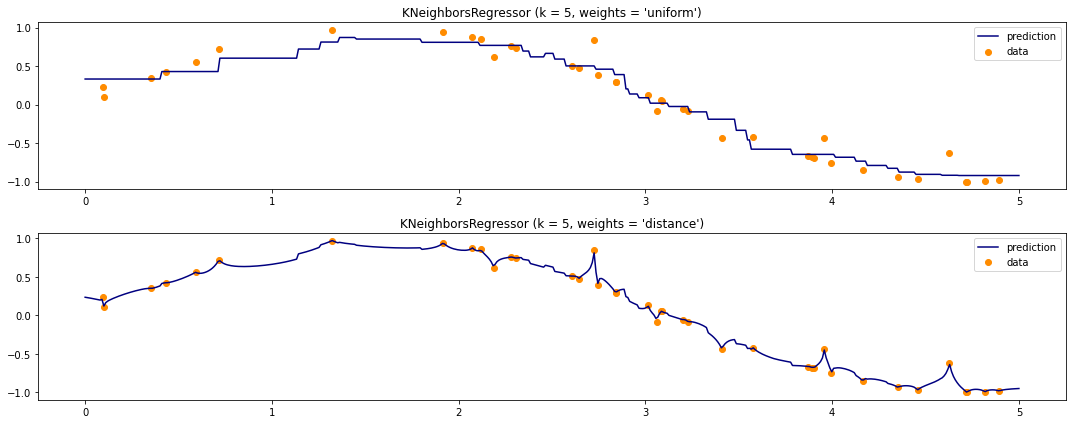

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
print("data Y", y)
# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    print(i,weights)
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()